In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))

if project_root not in sys.path:
    sys.path.append(project_root)

In [2]:
from spectral_clustering import *
from stability_analysis import *
from parameter_fitting import *
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd

In [3]:
import warnings

warnings.filterwarnings(
    "ignore", message="KMeans is known to have a memory leak on Windows with MKL"
)

In [4]:
data = pd.read_csv(project_root + "/Data/glass.csv")

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(data.drop(columns=["Type"]).to_numpy())
y_true = data["Type"].to_numpy()

We observe that the data has varying density, which means that knn or mutual knn might be the best graph type

In [6]:
distance_matrix = get_distance_matrix_from_data(X)

In [7]:
parameter_grid_fully_connected = {
    "sim_graph_type": ["fully_connect"],
    "K": [50],  # Just a place holder, doesn't affect anything
    "sigma": [
        # 0.01, # Too small. Produce isolated clusters
        # 0.02,
        # 0.03,
        # 0.04,
        # 0.05,
        0.1,
        0.15,
        0.2,
        0.25,
        0.3,
        0.4,
        0.5,
        0.6,
        0.75,
        1.0,
        1.5,
        2.0,
    ],
    "knn": [0],
    "mutual_knn": [0],
    "epsilon": [0],
}

parameter_grid_knn = {
    "sim_graph_type": ["knn"],
    "K": [50],  # Just a place holder, doesn't affect anything
    "sigma": [0],
    "knn": [3, 5, 6, 7, 8, 10, 12, 15, 17, 20, 23, 27, 30, 35, 40],
    "mutual_knn": [0],
    "epsilon": [0],
}

parameter_grid_mutual_knn = {
    "sim_graph_type": ["mutual_knn"],
    "K": [50],  # Just a place holder, doesn't affect anything
    "sigma": [0],
    "knn": [0],
    "mutual_knn": [5, 6, 7, 8, 10, 12, 15, 17, 20, 23, 27, 30, 35, 40],
    "epsilon": [0],
}

parameter_grid_eps_neighborhood = {
    "sim_graph_type": ["eps_neighbor"],
    "K": [50],  # Just a place holder, doesn't affect anything
    "sigma": [0],
    "knn": [0],
    "mutual_knn": [0],
    "epsilon": [
        # 0.05, Too small, produce lots of singleton clusters
        # 0.1,
        # 0.15,
        0.2,
        0.25,
        0.3,
        0.5,
        0.75,
        1.0,
        1.25,
        1.5,
        2.0,
        4.0,
        8.0,
    ],
}

In [8]:
K = 2

params_mutual_knn_1 = {
    "sim_graph_type": "mutual_knn",
    "K": K,
    "sigma": [0],
    "mutual_knn": 20,
    "knn": [0],
    "epsilon": [0],
}


params_mutual_knn_2 = {
    "sim_graph_type": "mutual_knn",
    "K": K,
    "sigma": [0],
    "mutual_knn": 30,
    "knn": [0],
    "epsilon": [0],
}


params_mutual_knn_3 = {
    "sim_graph_type": "mutual_knn",
    "K": K,
    "sigma": [0],
    "mutual_knn": 45,
    "knn": [0],
    "epsilon": [0],
}


params_mutual_knn_4 = {
    "sim_graph_type": "mutual_knn",
    "K": K,
    "sigma": [0],
    "mutual_knn": 70,
    "knn": [0],
    "epsilon": [0],
}

params_mutual_knn_5 = {
    "sim_graph_type": "mutual_knn",
    "K": K,
    "sigma": [0],
    "mutual_knn": 100,
    "knn": [0],
    "epsilon": [0],
}

In [9]:
similarity_matrix_mutual_knn_1 = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=params_mutual_knn_1["sim_graph_type"],
    mutual_knn=params_mutual_knn_1["mutual_knn"],  # Best param
)

res_mutual_knn_1 = Spectral_Clustering(
    similarity_matrix_mutual_knn_1,
    K=params_mutual_knn_1["K"],
    random_state=1,
)

similarity_matrix_mutual_knn_2 = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=params_mutual_knn_2["sim_graph_type"],
    mutual_knn=params_mutual_knn_2["mutual_knn"],
)

res_mutual_knn_2 = Spectral_Clustering(
    similarity_matrix_mutual_knn_2,
    K=params_mutual_knn_2["K"],
    random_state=1,
)

similarity_matrix_mutual_knn_3 = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=params_mutual_knn_3["sim_graph_type"],
    mutual_knn=params_mutual_knn_3["mutual_knn"],
)

res_mutual_knn_3 = Spectral_Clustering(
    similarity_matrix_mutual_knn_3,
    K=params_mutual_knn_3["K"],
    random_state=1,
)

similarity_matrix_mutual_knn_4 = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=params_mutual_knn_4["sim_graph_type"],
    mutual_knn=params_mutual_knn_4["mutual_knn"],
)

res_mutual_knn_4 = Spectral_Clustering(
    similarity_matrix_mutual_knn_4,
    K=params_mutual_knn_4["K"],
    random_state=1,
)

similarity_matrix_mutual_knn_5 = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=params_mutual_knn_5["sim_graph_type"],
    mutual_knn=params_mutual_knn_5["mutual_knn"],
)

res_mutual_knn_5 = Spectral_Clustering(
    similarity_matrix_mutual_knn_5,
    K=params_mutual_knn_4["K"],
    random_state=1,
)

In [13]:
res_mutual_knn_1.labels[res_mutual_knn_1.labels == 1]

array([1])

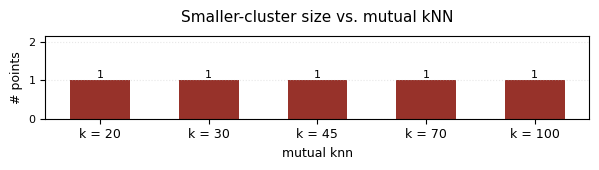

In [18]:
mutual_knn_results = [
    (20, res_mutual_knn_1),
    (30, res_mutual_knn_2),
    (45, res_mutual_knn_3),
    (70, res_mutual_knn_4),
    (100, res_mutual_knn_5),
]


def plot_mutual_knn_smaller_cluster_size(result_pairs):
    """Plot the number of points in the smaller cluster (K=2) for each mutual-kNN setting."""
    x_positions = np.arange(len(result_pairs))
    fig, ax = plt.subplots(figsize=(6.2, 1.8))  # thinner chart
    color = PRESENTATION_COLORS[0] if "PRESENTATION_COLORS" in globals() else "C0"

    smaller_sizes = []
    for _, res in result_pairs:
        # Count both labels and take the smaller one (label identities can swap).
        n0 = int(np.count_nonzero(res.labels == 0))
        n1 = int(np.count_nonzero(res.labels == 1))
        smaller_sizes.append(min(n0, n1))

    ax.bar(x_positions, smaller_sizes, width=0.55, color=color, alpha=0.9)

    for x, size in zip(x_positions, smaller_sizes):
        ax.text(x, size, f"{size}", ha="center", va="bottom", fontsize=8)

    ax.set_xticks(x_positions)
    ax.set_xticklabels([f"k = {k}" for k, _ in result_pairs], fontsize=9)
    ax.set_ylabel("# points", fontsize=9)
    ax.set_xlabel("mutual knn", fontsize=9)
    ax.set_title("Smaller-cluster size vs. mutual kNN", fontsize=11, pad=10)
    ax.grid(axis="y", linestyle=":", alpha=0.3)
    ax.tick_params(axis="y", labelsize=8)

    ymax = max(smaller_sizes) if smaller_sizes else 1
    ax.set_ylim(0, ymax * 1.15 + 1)
    fig.tight_layout()


plot_mutual_knn_smaller_cluster_size(mutual_knn_results)